In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
domains = ["www.tiktok.com", "www.instagram.com", "www.facebook.com", "www.youtube.com", "twitter.com"]
results = []

for year in years:
    for domain in domains:
        url = "https://api.ooni.io/api/v1/aggregation"
        params = {
            "axis_x": "probe_cc",
            "axis_y": "domain",
            "test_name": "web_connectivity",
            "since": f"{year}-01-01",
            "until": f"{year}-12-31",
            "domain": domain
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            blocked_countries = set()
            for row in data.get("result", []):
                if row.get("confirmed_count", 0) > 0:
                    blocked_countries.add(row["probe_cc"])
            results.append({
                "year": year,
                "domain": domain,
                "num_countries": len(blocked_countries)
            })
        else:
            results.append({
                "year": year,
                "domain": domain,
                "num_countries": 0
            })

# Convert to DataFrame
df = pd.DataFrame(results)

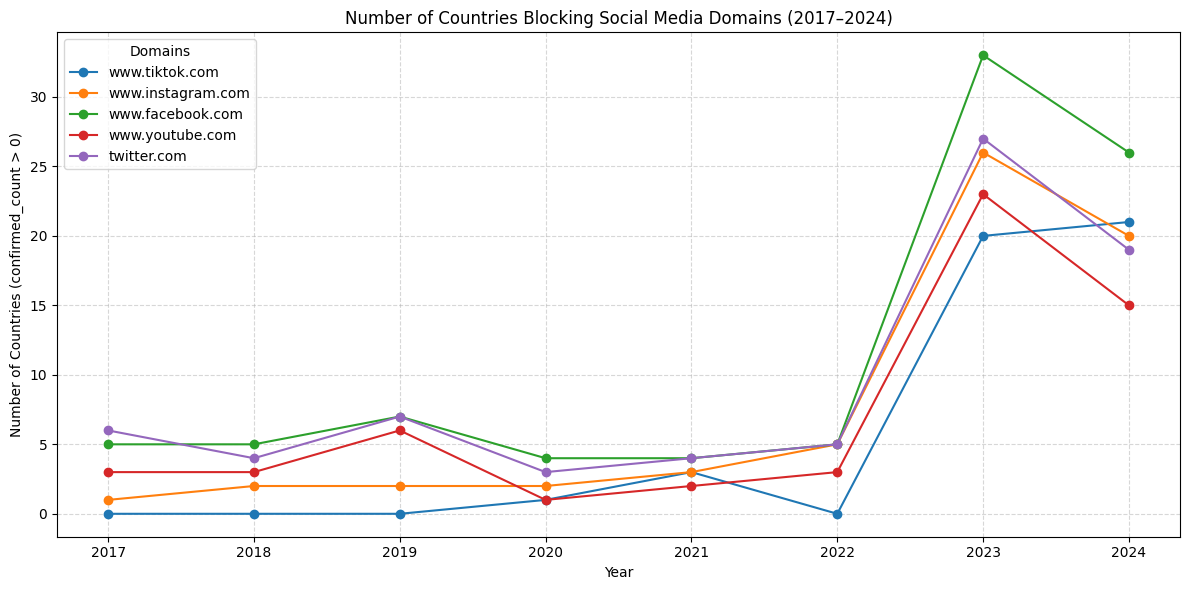

In [9]:
plt.figure(figsize=(12, 6))
for domain in domains:
    subset = df[df["domain"] == domain]
    plt.plot(subset["year"], subset["num_countries"], marker='o', label=domain)

plt.title("Number of Countries Blocking Social Media Domains (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Countries (confirmed_count > 0)")
plt.xticks(years)
plt.legend(title="Domains")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
import requests
import pandas as pd

domains = ["facebook.com", "twitter.com", "youtube.com", "instagram.com", "whatsapp.com"]
years = list(range(2017, 2025))

all_data = []

for domain in domains:
    print(f"🔍 Fetching data for: {domain}")
    for year in years:
        since = f"{year}-01-01"
        until = f"{year}-12-31"

        url = "https://api.ooni.io/api/v1/aggregation"
        params = {
            "axis_x": "probe_cc",
            "axis_y": None,
            "test_name": "web_connectivity",
            "input": domain,
            "since": since,
            "until": until
        }

        response = requests.get(url, params=params)
        data = response.json()

        if "result" not in data:
            print(f"⚠️ No data for {domain} in {year}")
            continue

        # Count countries with confirmed blocking
        num_confirmed_countries = sum(1 for r in data["result"] if r.get("confirmed_count", 0) > 0)

        all_data.append({
            "domain": domain,
            "year": year,
            "num_countries": num_confirmed_countries
        })

# Convert to DataFrame
df = pd.DataFrame(all_data)


🔍 Fetching data for: facebook.com
🔍 Fetching data for: twitter.com
🔍 Fetching data for: youtube.com
🔍 Fetching data for: instagram.com
🔍 Fetching data for: whatsapp.com


In [7]:
df['domain'] = df['input'].progress_apply(lambda r: urlparse(r).netloc)

KeyError: 'input'

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
domains = ["www.tiktok.com", "www.instagram.com", "www.facebook.com", "www.youtube.com", "twitter.com", "www.whatsapp.com"]
results = []

for year in years:
    for domain in domains:
        url = "https://api.ooni.io/api/v1/aggregation"
        params = {
            "axis_x": "probe_cc",
            "axis_y": "domain",
            "test_name": "web_connectivity",
            "since": f"{year}-01-01",
            "until": f"{year}-12-31",
            "domain": domain
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            blocked_countries = set()
            for row in data.get("result", []):
                if row.get("confirmed_count", 0) > 0:
                    blocked_countries.add(row["probe_cc"])
            results.append({
                "year": year,
                "domain": domain,
                "num_countries": len(blocked_countries)
            })
        else:
            results.append({
                "year": year,
                "domain": domain,
                "num_countries": 0
            })

# Convert to DataFrame
df = pd.DataFrame(results)

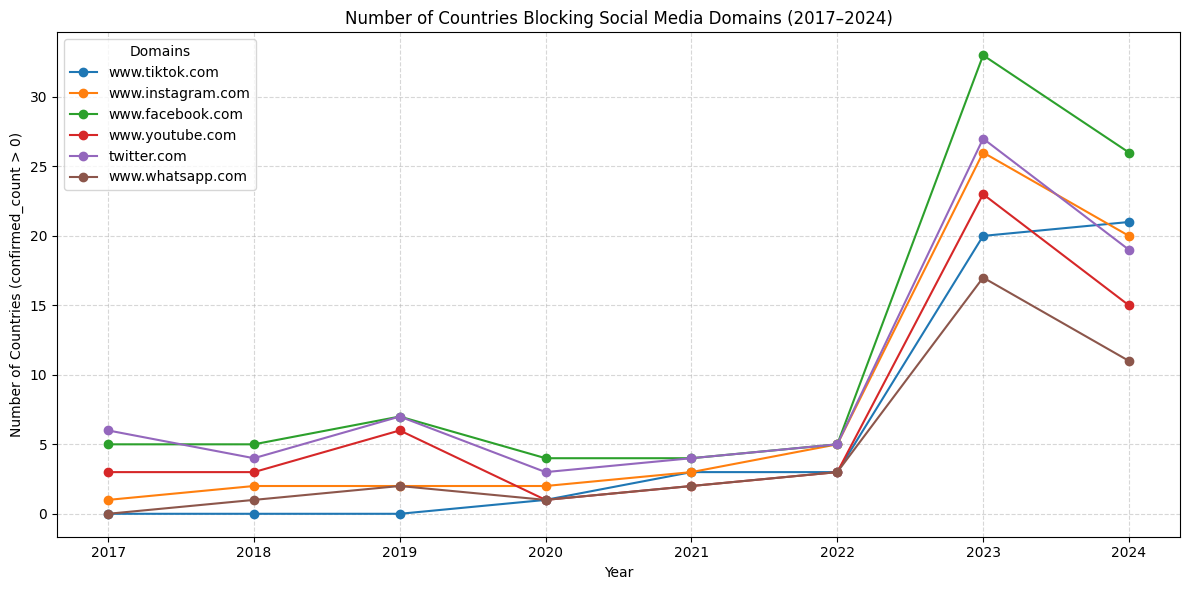

In [2]:
plt.figure(figsize=(12, 6))
for domain in domains:
    subset = df[df["domain"] == domain]
    plt.plot(subset["year"], subset["num_countries"], marker='o', label=domain)

plt.title("Number of Countries Blocking Social Media Domains (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Countries (confirmed_count > 0)")
plt.xticks(years)
plt.legend(title="Domains")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()